Task-05


Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.



Dataset :- https://www.kaggle.com/code/harshalbhamare/us-accident-eda



In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load and read the file
df=pd.read_csv("/content/RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
#shape/ size of the data
df.shape

(12316, 32)

In [ ]:
#checking the numerical statistics of the data
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,3998.000000,3998.000000
mean,1.933467,1.419960
std,0.612255,0.917389
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,1.000000
max,6.000000,8.000000


In [ ]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,3998,3998,3998,3998,3764,3838,3732,3670,3844,2682,...,3932,3998,3998,3998,3998,2930,3124,3998,3998,3998
unique,769,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,17:30:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,39,667,1474,3639,2466,3088,1110,1048,3394,919,...,2732,1592,1627,1393,2220,1892,3100,3725,746,3489
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         3998 non-null   object 
 1   Day_of_week                  3998 non-null   object 
 2   Age_band_of_driver           3998 non-null   object 
 3   Sex_of_driver                3998 non-null   object 
 4   Educational_level            3764 non-null   object 
 5   Vehicle_driver_relation      3838 non-null   object 
 6   Driving_experience           3732 non-null   object 
 7   Type_of_vehicle              3670 non-null   object 
 8   Owner_of_vehicle             3844 non-null   object 
 9   Service_year_of_vehicle      2682 non-null   object 
 10  Defect_of_vehicle            2523 non-null   object 
 11  Area_accident_occured        3918 non-null   object 
 12  Lanes_or_Medians             3866 non-null   object 
 13  Road_allignment 

# Exploratory Data Analysis

In [ ]:
#finding duplicate values
df.duplicated().sum()

8317

In [ ]:
#Distribution of Accident severity
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     3489
Serious Injury     481
Fatal injury        28
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Accident severity')

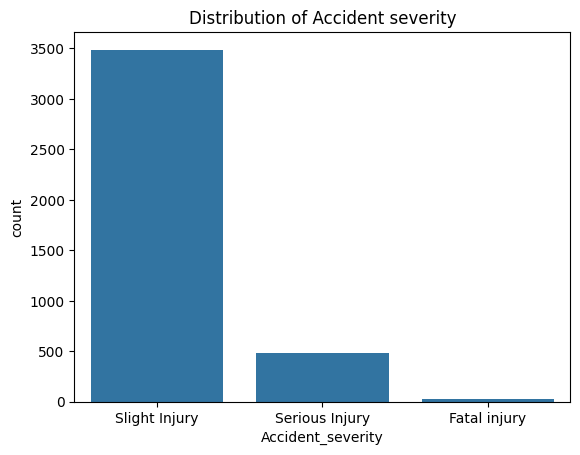

In [ ]:
#plotting the final class
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')

# Handling missing values

In [ ]:
#checking missing values
df.isna().sum()

Time                           8318
Day_of_week                    8318
Age_band_of_driver             8318
Sex_of_driver                  8318
Educational_level              8552
Vehicle_driver_relation        8478
Driving_experience             8584
Type_of_vehicle                8646
Owner_of_vehicle               8472
Service_year_of_vehicle        9634
Defect_of_vehicle              9793
Area_accident_occured          8398
Lanes_or_Medians               8450
Road_allignment                8363
Types_of_Junction              8318
Road_surface_type              8375
Road_surface_conditions        8318
Light_conditions               8318
Weather_conditions             8318
Type_of_collision              8363
Number_of_vehicles_involved    8318
Number_of_casualties           8318
Vehicle_movement               8384
Casualty_class                 8318
Sex_of_casualty                8318
Age_band_of_casualty           8318
Casualty_severity              8318
Work_of_casuality           

In [ ]:
#dropping columns which has more than 2500 missing values and Time column
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'],
        axis = 1, inplace = True)
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2.0,2.0,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2.0,2.0,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2.0,2.0,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2.0,2.0,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2.0,2.0,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


# Data Visualization

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

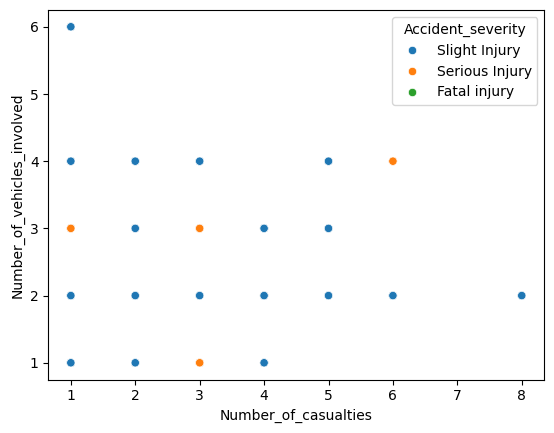

In [ ]:
#plotting relationship between Number_of_casualties and Number_of_vehicles_involved
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])

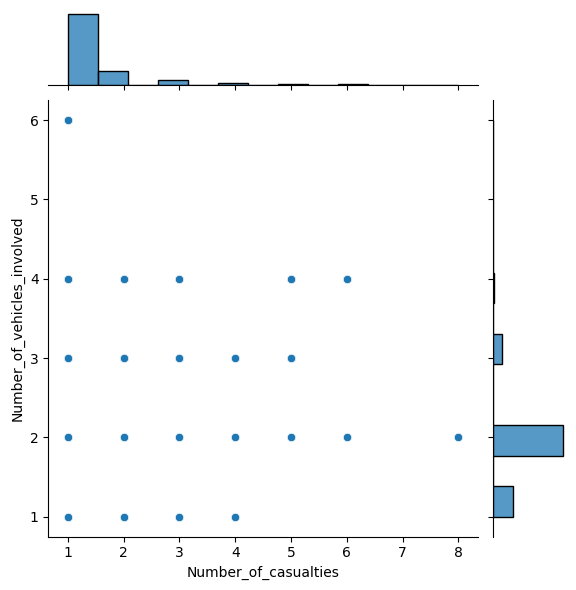

In [ ]:
#joint Plot
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=df)

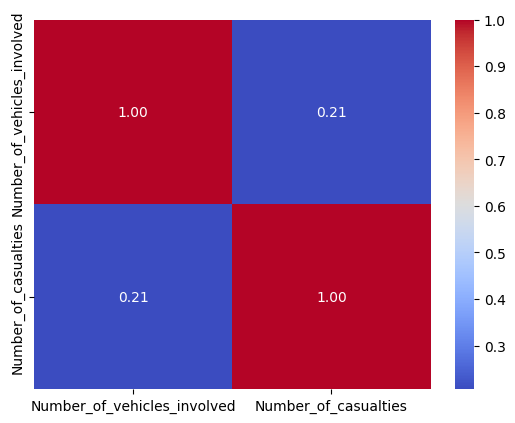

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select only numerical columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [ ]:
#storing numerical column names to a variable
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerica variables are',numerical)

The numerica variables are ['Number_of_vehicles_involved', 'Number_of_casualties']


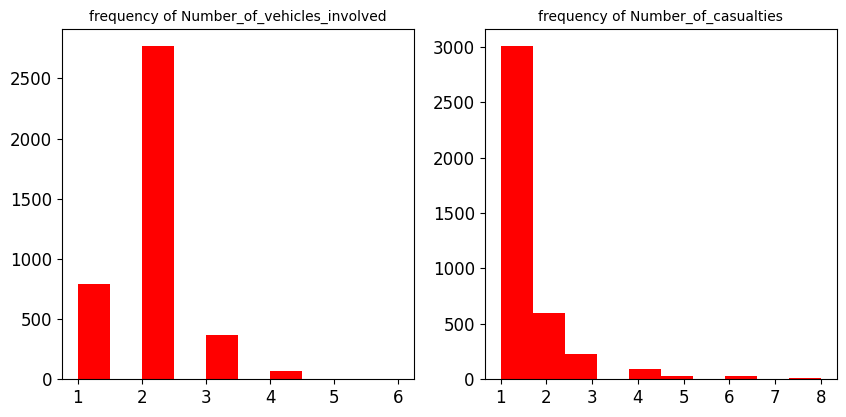

In [ ]:
#distribution for numerical columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1

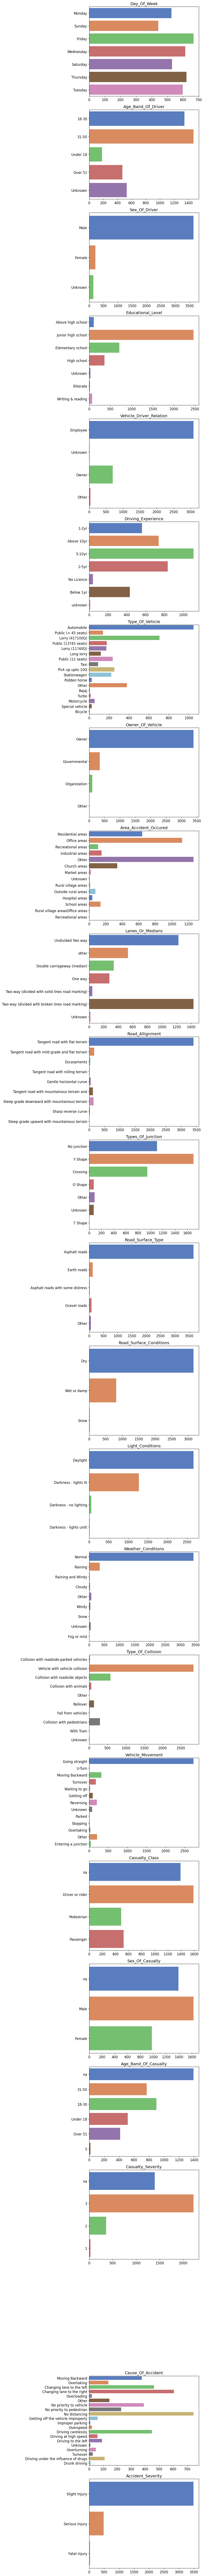

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of categorical columns
categorical = df.select_dtypes(include=['object']).columns.tolist()

# Plot count plots for each categorical column
plt.figure(figsize=(10, len(categorical) * 5))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col != 'Pedestrian_movement':
        ax1 = plt.subplot(len(categorical), 1, plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber += 1

plt.tight_layout()
plt.show()


# Handling Categorical Values

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (you should replace this with your actual DataFrame)
data = {
    'Category1': ['A', 'B', 'A', 'C'],
    'Category2': ['X', 'Y', 'X', 'Z'],
    'Accident_severity': [1, 0, 1, 0]
}
df = pd.DataFrame(data)

# List of categorical columns
categorical = ['Category1', 'Category2']

# Initializing the label encoder
le = LabelEncoder()

# Creating a new data frame for performing the chi2 analysis
df1 = pd.DataFrame()

# Adding all the categorical columns except the output to the new data frame
for i in categorical:
    if i != 'Accident_severity':
        df1[i] = le.fit_transform(df[i])

# Displaying the new DataFrame
print(df1)


   Category1  Category2
0          0          0
1          1          1
2          0          0
3          2          2


In [ ]:
#importing label encoing module
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#creating a new data frame from performing the chi2 analysis
df1=pd.DataFrame()

#adding all the categorical columns except the output to new data frame
for i in categorical:
    if i!= 'Accident_severity':
        df1[i]=le.fit_transform(df[i])

In [ ]:
#confirming the data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Category1  4 non-null      int64
 1   Category2  4 non-null      int64
dtypes: int64(2)
memory usage: 192.0 bytes


**Correlation **

<Axes: >

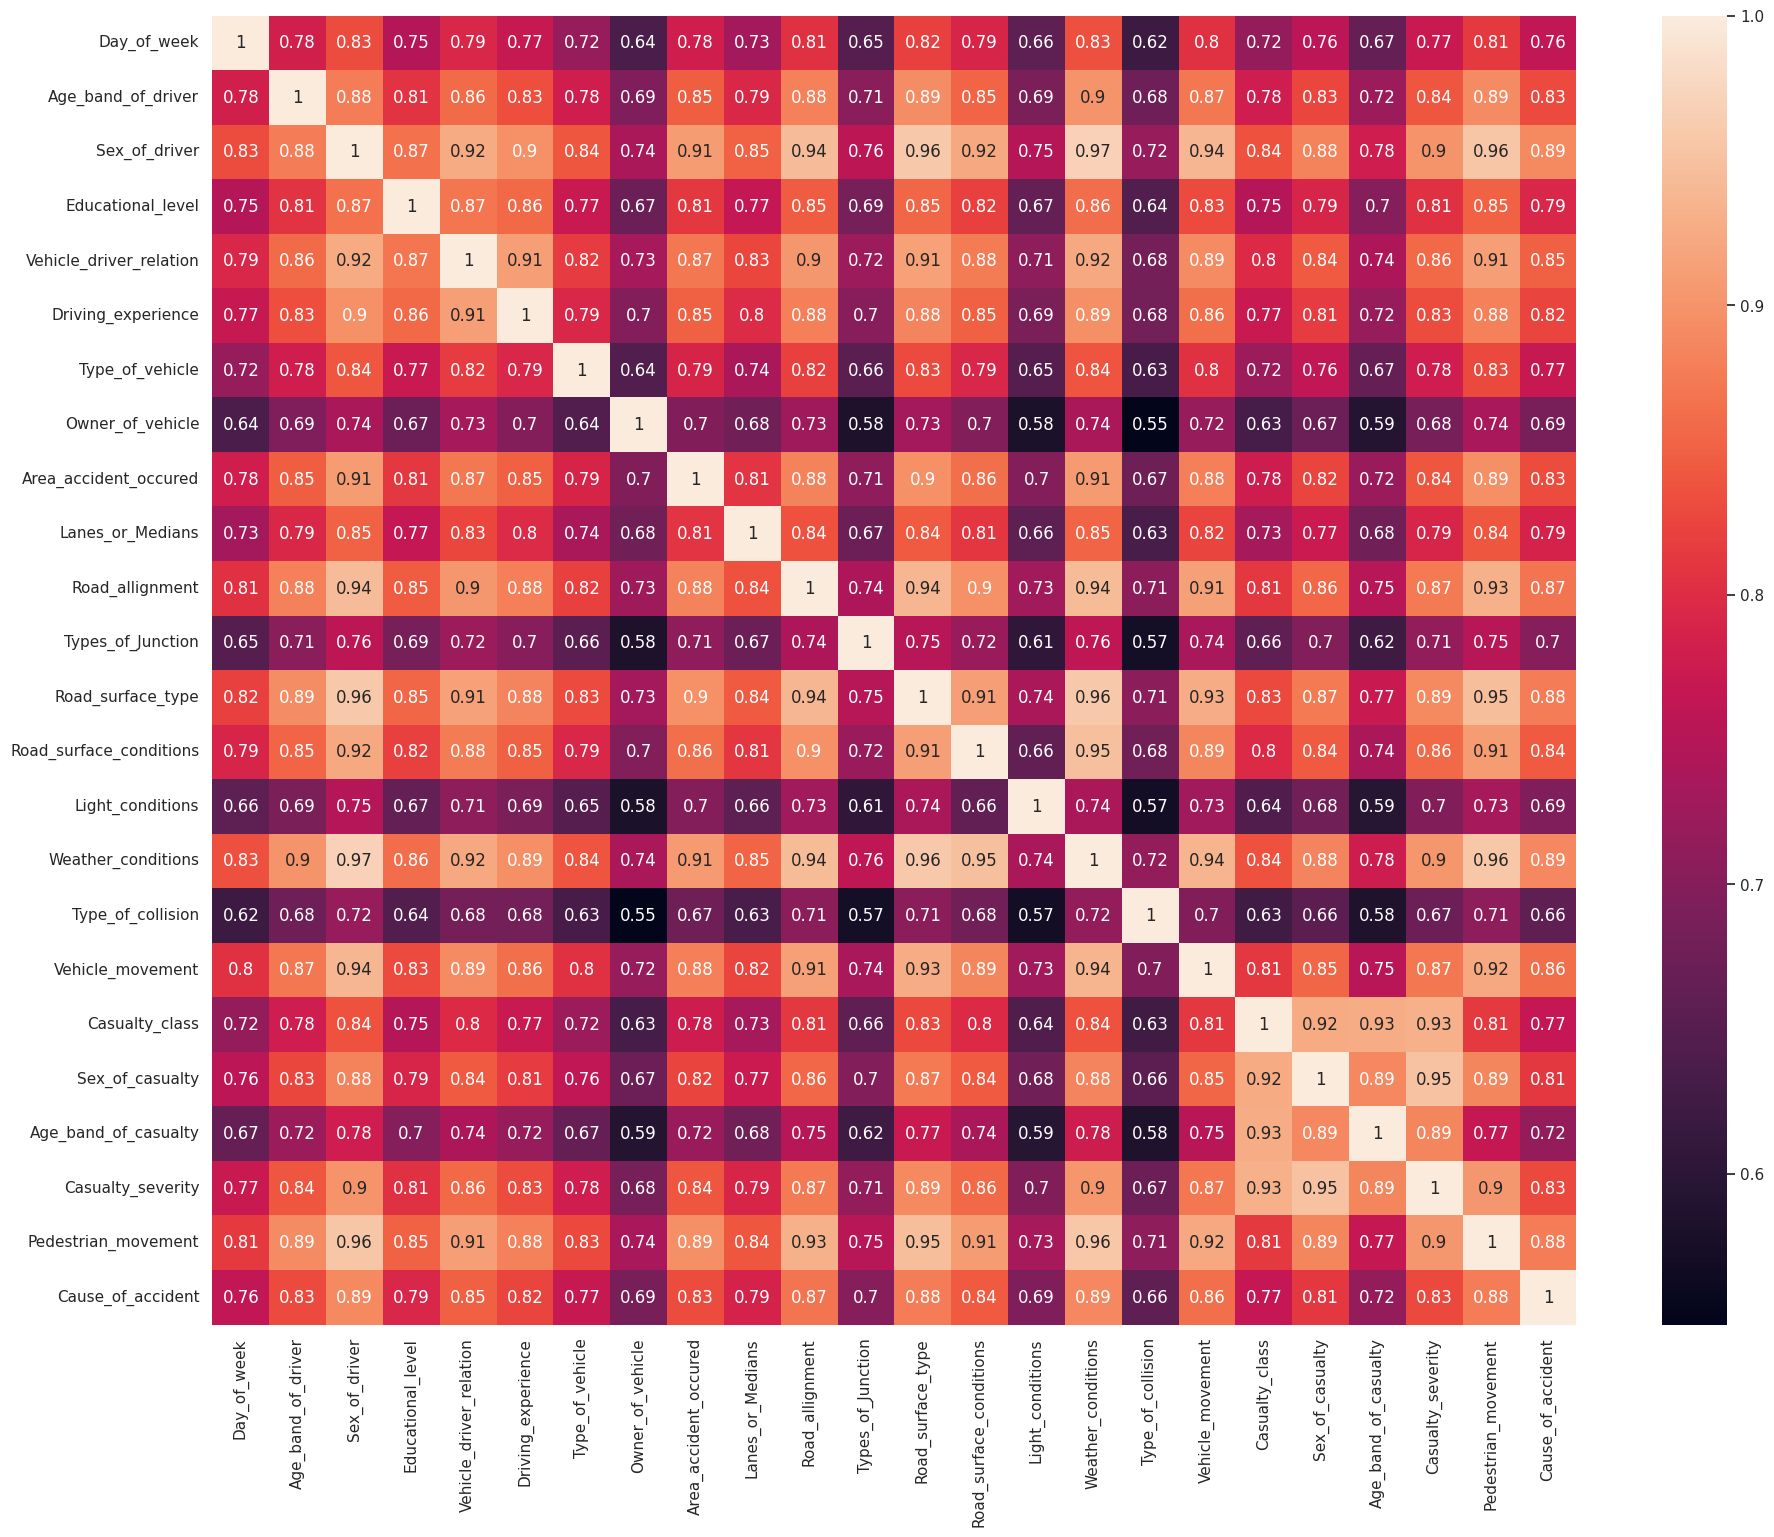

In [ ]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1)
sns.heatmap(df1.corr(), annot=True)

In [ ]:
#label encoded data set
df1.head()

,Category1,Category2
0,0,0
1,1,1
2,0,0
3,2,2


In [ ]:
#import chi2 test
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Accident_severity'])

In [ ]:
#f_p_values will return Fscore and pvalues
f_p_values

(array([3., 3.]), array([0.08326452, 0.08326452]))

In [ ]:
#for better understanding and ease of access adding them to a new dataframe
f_p_values1=pd.DataFrame({'features':df1.columns, 'Fscore': f_p_values[0], 'Pvalues':f_p_values[1]})
f_p_values1

,features,Fscore,Pvalues
0,Category1,3.0,0.083265
1,Category2,3.0,0.083265


In [ ]:
#since we want lower Pvalues we are sorting the features
f_p_values1.sort_values(by='Pvalues',ascending=True)

,features,Fscore,Pvalues
0,Category1,3.0,0.083265
1,Category2,3.0,0.083265


# **Oversampling**

In [ ]:
# Importing necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Example DataFrame (you should replace this with your actual DataFrame)
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80],
    'Accident_severity': [0, 1, 0, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Defining features (x) and target (y)
x = df[['Feature1', 'Feature2']]
y = df['Accident_severity']

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing SMOTE
oversample = SMOTE()

# Applying SMOTE to the training data
x_train_resampled, y_train_resampled = oversample.fit_resample(x_train, y_train)

# Displaying the resampled data
print("Resampled x_train:")
print(x_train_resampled)
print("\nResampled y_train:")
print(y_train_resampled)


Resampled x_train:
   Feature1  Feature2
0         1        10
1         8        80
2         3        30
3         5        50
4         4        40
5         7        70

Resampled y_train:
0    0
1    1
2    0
3    1
4    0
5    1
Name: Accident_severity, dtype: int64


In [ ]:
# Importing necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Example DataFrame (you should replace this with your actual DataFrame)
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80],
    'Accident_severity': [0, 1, 0, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Defining features (x) and target (y)
x = df[['Feature1', 'Feature2']]
y = df['Accident_severity']

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing SMOTE
oversample = SMOTE()

# Applying SMOTE to the training data
x_train_resampled, y_train_resampled = oversample.fit_resample(x_train, y_train)

# Checking the oversampling output
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['Accident_severity'])
value_counts = y_resampled_df['Accident_severity'].value_counts()

print("Resampled target variable value counts:")
print(value_counts)


Resampled target variable value counts:
Accident_severity
0    3
1    3
Name: count, dtype: int64


<ipython-input-21-05a690c7477b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='muted')


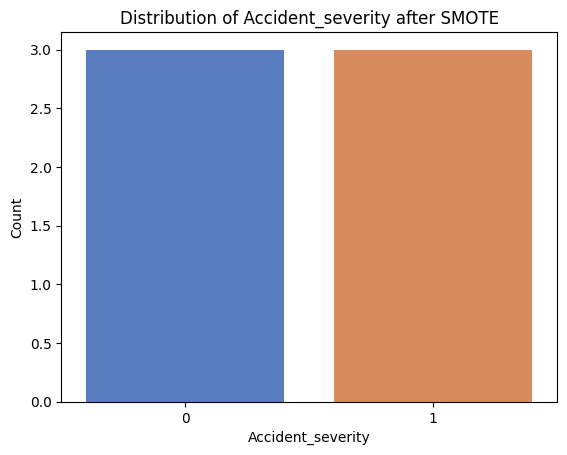

In [ ]:
# Importing necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (you should replace this with your actual DataFrame)
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80],
    'Accident_severity': [0, 1, 0, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Defining features (x) and target (y)
x = df[['Feature1', 'Feature2']]
y = df['Accident_severity']

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing SMOTE
oversample = SMOTE()

# Applying SMOTE to the training data
x_train_resampled, y_train_resampled = oversample.fit_resample(x_train, y_train)

# Visualizing the distribution of the resampled target variable
sns.countplot(x=y_train_resampled, palette='muted')
plt.xlabel('Accident_severity')
plt.ylabel('Count')
plt.title('Distribution of Accident_severity after SMOTE')
plt.show()


<ipython-input-23-59f394ce89fa>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='muted')


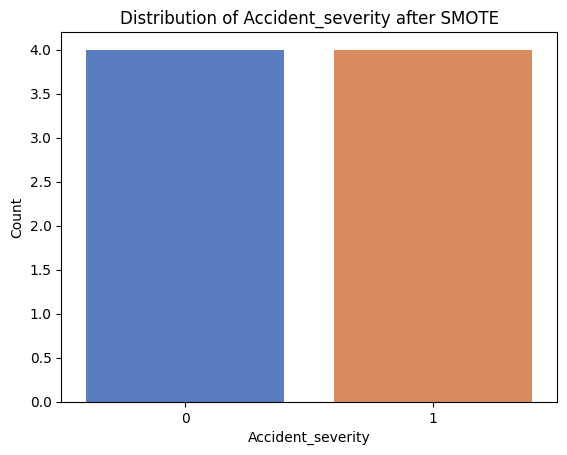

<ipython-input-24-c5e77ef2e8c4>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='muted')


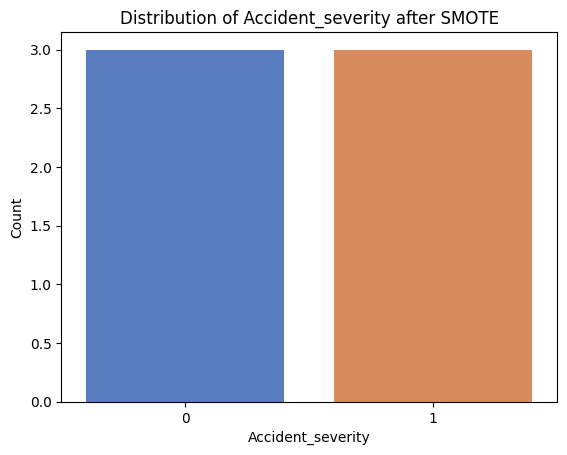

x_train shape: (4, 2)
x_test shape: (2, 2)
y_train shape: (4,)
y_test shape: (2,)


In [ ]:
# Importing necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (you should replace this with your actual DataFrame)
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80],
    'Accident_severity': [0, 1, 0, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Defining features (x) and target (y)
x = df[['Feature1', 'Feature2']]
y = df['Accident_severity']

# Splitting the dataset into initial train and test sets
x_train_initial, x_test_initial, y_train_initial, y_test_initial = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing SMOTE
oversample = SMOTE()

# Applying SMOTE to the training data
x_train_resampled, y_train_resampled = oversample.fit_resample(x_train_initial, y_train_initial)

# Splitting the resampled data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, test_size=0.30, random_state=42)

# Visualizing the distribution of the resampled target variable
sns.countplot(x=y_train_resampled, palette='muted')
plt.xlabel('Accident_severity')
plt.ylabel('Count')
plt.title('Distribution of Accident_severity after SMOTE')
plt.show()

# Displaying the shapes of the final training and testing sets
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4, 2) (2, 2) (4,) (2,)


KNN **MODEL**

In [ ]:
#KNN model alg
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

<ipython-input-28-e5ecfae7052e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='muted')


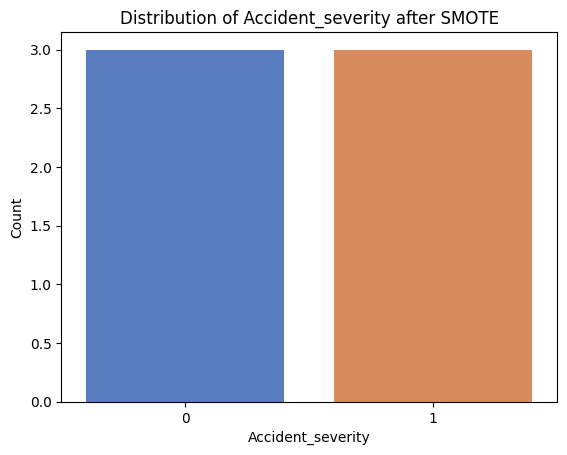

x_train shape: (4, 2)
x_test shape: (2, 2)
y_train shape: (4,)
y_test shape: (2,)
Predictions on test set:
[0 0]


In [ ]:
# Importing necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (you should replace this with your actual DataFrame)
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80],
    'Accident_severity': [0, 1, 0, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Defining features (x) and target (y)
x = df[['Feature1', 'Feature2']]
y = df['Accident_severity']

# Splitting the dataset into initial train and test sets
x_train_initial, x_test_initial, y_train_initial, y_test_initial = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing SMOTE
oversample = SMOTE()

# Applying SMOTE to the training data
x_train_resampled, y_train_resampled = oversample.fit_resample(x_train_initial, y_train_initial)

# Splitting the resampled data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, test_size=0.30, random_state=42)

# Visualizing the distribution of the resampled target variable
sns.countplot(x=y_train_resampled, palette='muted')
plt.xlabel('Accident_severity')
plt.ylabel('Count')
plt.title('Distribution of Accident_severity after SMOTE')
plt.show()

# Displaying the shapes of the final training and testing sets
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Initializing and training the KNN model
model_KNN = KNeighborsClassifier(n_neighbors=min(5, len(x_train)))  # Ensure n_neighbors <= len(x_train)
model_KNN.fit(x_train, y_train)

# Making predictions
y_pred = model_KNN.predict(x_test)

# Displaying the predictions
print("Predictions on test set:")
print(y_pred)


**# Checking Accuracy, Classification Report, Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay


In [ ]:
report_KNN=classification_report(y_test,y_pred)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)

0.5
